### SAKSHI NAIR (saknair) ###

#### Importing Libraries ####

In [106]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 217.9 kB/s eta 0:11:29
   ---------------------------------------- 0.1/150.0 MB 544.7 kB/s eta 0:04:36
   ---------------------------------------- 0.4/150.0 MB 1.5 MB/s eta 0:01:41
   ---------------------------------------- 0.5/150.0 MB 2.0 MB/s eta 0:01:17
   ---------------------------------------- 0.8/150.0 MB 2.5 MB/s eta 0:01:01
   ---------------------------------------- 1.1/150.0 MB 2.8 MB/s eta 0:00:53
   ---------------------------------------- 1.3/150.0 MB 3.0 MB/s eta 0:00:50
   ---------------------------------------- 1.6/150.0 MB 3.3 MB/s eta 0:00:46
    --------------------------------------- 1.9/150.0 MB 3.5 MB/s eta 0:00:43
    ------

In [180]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
ball_by_ball = pd.read_csv("C:/Users/PC/Desktop/Datasets/IPL_Ball_by_Ball_2008_2022.csv")
match_results = pd.read_csv("C:/Users/PC/Desktop/Datasets/IPL_Matches_Result_2008_2022.csv")
extra_data = pd.read_csv("C:/Users/PC/Desktop/Datasets/data.csv")

In [3]:
print(" Ball-by-Ball Dataset:")
display(ball_by_ball.head())

 Ball-by-Ball Dataset:


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
print("Match Results Dataset:")
display(match_results.head())

Match Results Dataset:


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [5]:
print("Aggregated Match Features Dataset (data.csv):")
display(extra_data.head())

Aggregated Match Features Dataset (data.csv):


,Unnamed: 0,ID,out,predicted_runs,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,...,Venue_Shaheed Veer Narayan Singh International Stadium,Venue_Sharjah Cricket Stadium,Venue_Sheikh Zayed Stadium,Venue_St George's Park,Venue_Subrata Roy Sahara Stadium,Venue_SuperSport Park,"Venue_Vidarbha Cricket Association Stadium, Jamtha",Venue_Wankhede Stadium,"Venue_Wankhede Stadium, Mumbai","Venue_Zayed Cricket Stadium, Abu Dhabi"
0,0,335982,1,47.777449,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,335982,4,33.541425,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,335983,1,47.636404,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,335983,0,51.826802,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,335984,2,43.126347,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print("\nBall-by-Ball Data Information:")
ball_by_ball.info()


Ball-by-Ball Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    

In [13]:
print("\nMatch Results Information:")
match_results.info()


Match Results Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    o

In [15]:
print("Data Information:")
extra_data.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 85 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  1898 non-null   int64  
 1   ID                                                          1898 non-null   int64  
 2   out                                                         1898 non-null   int64  
 3   predicted_runs                                              1898 non-null   float64
 4   BattingTeam_Chennai Super Kings                             1898 non-null   int64  
 5   BattingTeam_Deccan Chargers                                 1898 non-null   int64  
 6   BattingTeam_Delhi Capitals                                  1898 non-null   int64  
 7   BattingTeam_Gujarat Titans                                  1898 non-

#### Handling Missing Values ####

##### I created a function to know missing values in each dataset. #####

In [19]:
def print_missing_values(df, name):
    print(f" Missing Values in {name} Dataset:")
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if missing.empty:
        print("No missing values.\n")
    else:
        print(missing)
        print()

print_missing_values(ball_by_ball, "Ball-by-Ball")
print_missing_values(match_results, "Match Results")
print_missing_values(extra_data, "Aggregated Features (data.csv)")

 Missing Values in Ball-by-Ball Dataset:
extra_type           213905
player_out           214803
kind                 214803
fielders_involved    217966
dtype: int64

 Missing Values in Match Results Dataset:
City                51
SuperOver            4
WinningTeam          4
Margin              18
method             931
Player_of_Match      4
dtype: int64

 Missing Values in Aggregated Features (data.csv) Dataset:
No missing values.



In [20]:
ball_by_ball['extra_type'] = ball_by_ball['extra_type'].fillna('None')
ball_by_ball['player_out'] = ball_by_ball['player_out'].fillna('None')
ball_by_ball['kind'] = ball_by_ball['kind'].fillna('None')
ball_by_ball['fielders_involved'] = ball_by_ball['fielders_involved'].fillna('None')

In [23]:
print(ball_by_ball.isnull().sum())

ID                   0
innings              0
overs                0
ballnumber           0
batter               0
bowler               0
non-striker          0
extra_type           0
batsman_run          0
extras_run           0
total_run            0
non_boundary         0
isWicketDelivery     0
player_out           0
kind                 0
fielders_involved    0
BattingTeam          0
dtype: int64


In [25]:
match_results['City'] = match_results['City'].fillna(match_results['City'].mode()[0])
match_results['WinningTeam'] = match_results['WinningTeam'].fillna(match_results['WinningTeam'].mode()[0])
match_results['method'] = match_results['method'].fillna('normal')
match_results['Margin'] = match_results['Margin'].fillna(match_results['Margin'].mean())
match_results['SuperOver'] = match_results['SuperOver'].fillna(match_results['SuperOver'].mode()[0])
match_results['Player_of_Match'] = match_results['Player_of_Match'].fillna(match_results['Player_of_Match'].mode()[0])

In [27]:
print(match_results.isnull().sum())

ID                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
SuperOver          0
WinningTeam        0
WonBy              0
Margin             0
method             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
dtype: int64


#### Standardizing team and venue names ####

In [30]:
team_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}

for col in ['Team1', 'Team2', 'WinningTeam', 'batting_team', 'bowling_team']:
    if col in match_results.columns:
        match_results[col] = match_results[col].replace(team_mapping)
    if col in extra_data.columns:
        extra_data[col] = extra_data[col].replace(team_mapping)

match_results['Venue'] = match_results['Venue'].str.strip().str.title()

#### Removing Outliers ####

In [33]:
Q1 = ball_by_ball['total_run'].quantile(0.25)
Q3 = ball_by_ball['total_run'].quantile(0.75)
IQR = Q3 - Q1

ball_by_ball = ball_by_ball[
    (ball_by_ball['total_run'] >= Q1 - 1.5 * IQR) & 
    (ball_by_ball['total_run'] <= Q3 + 1.5 * IQR)
]

#### Merging Similar Columns ####

In [36]:
def merge_similar_columns(df, target_prefix, merge_groups):
    """
    Merges columns in a DataFrame that start with a given prefix and have alternate spellings/names.
    
    Parameters:
    - df: DataFrame to modify
    - target_prefix: e.g., 'BowlingTeam_' or 'Venue_'
    - merge_groups: list of tuples -> (base_name, [variant1, variant2, ...])
    """
    for base, variants in merge_groups:
        base_col = target_prefix + base
        if base_col not in df.columns:
            df[base_col] = 0

        for variant in variants:
            variant_col = target_prefix + variant
            if variant_col in df.columns:
                df[base_col] += df[variant_col]
                df.drop(variant_col, axis=1, inplace=True)

    return df

In [38]:
team_variants = [
    ("Rising Pune Supergiants", ["Rising Pune Supergiant"]),
    ("Delhi Capitals", ["Delhi Daredevils"]),
    ("Punjab Kings", ["Kings XI Punjab"])
]
venue_variants = [
    ("MA Chidambaram Stadium", ["MA Chidambaram Stadium, Chepauk", "MA Chidambaram Stadium, Chepauk, Chennai"]),
    ("Wankhede Stadium", ["Wankhede Stadium, Mumbai"]),
    ("Arun Jaitley Stadium", ["Arun Jaitley Stadium, Delhi"]),
    ("Punjab Cricket Association IS Bindra Stadium", [
        "Punjab Cricket Association IS Bindra Stadium, Mohali",
        "Punjab Cricket Association Stadium, Mohali"
    ])
]
extra_data = merge_similar_columns(extra_data, "BowlingTeam_", team_variants)
extra_data = merge_similar_columns(extra_data, "Venue_", venue_variants)

#### Creating new features ####

In [41]:
batsman_stats = ball_by_ball.groupby('batter').agg(
    runs=('batsman_run', 'sum'),
    balls=('batter', 'count')
).reset_index()

# Calculate strike rate
batsman_stats['strike_rate'] = (batsman_stats['runs'] / batsman_stats['balls']) * 100

# Add boundary indicator
ball_by_ball['is_boundary'] = ball_by_ball['batsman_run'].apply(lambda x: 1 if x >= 4 else 0)

#### Dropping irrelevant columns ####

In [44]:
columns_to_drop = ['ID', 'MatchNumber', 'Player_of_Match', 'Umpire1', 'Umpire2']

match_results = match_results.drop(columns=[col for col in columns_to_drop if col in match_results.columns])
extra_data = extra_data.drop(columns=[col for col in ['ID'] if col in extra_data.columns])

### Feature Engineering ####

In [47]:
ball_by_ball = pd.read_csv("C:/Users/PC/Desktop/Datasets/IPL_Ball_by_Ball_2008_2022.csv")
ball_by_ball['batsman_run'] = ball_by_ball['batsman_run'].fillna(0)
ball_by_ball['extra_type'] = ball_by_ball['extra_type'].fillna('None')
ball_by_ball['player_out'] = ball_by_ball['player_out'].fillna('None')

ball_by_ball['is_boundary'] = ball_by_ball['batsman_run'].apply(lambda x: 1 if x in [4, 6] else 0)
ball_by_ball['is_dot_ball'] = ball_by_ball['total_run'].apply(lambda x: 1 if x == 0 else 0)
ball_by_ball['is_wicket'] = ball_by_ball['player_out'].apply(lambda x: 0 if x == 'None' else 1)

In [48]:
agg_features = ball_by_ball.groupby(['ID', 'BattingTeam']).agg(
    total_runs=('total_run', 'sum'),
    balls_faced=('ballnumber', 'count'),
    boundaries=('is_boundary', 'sum'),
    dot_balls=('is_dot_ball', 'sum'),
    wickets_lost=('is_wicket', 'sum')
).reset_index()

In [49]:
agg_features['strike_rate'] = (agg_features['total_runs'] / agg_features['balls_faced']) * 100
agg_features['run_rate'] = agg_features['total_runs'] / (agg_features['balls_faced'] / 6)

In [50]:
agg_features.head()

,ID,BattingTeam,total_runs,balls_faced,boundaries,dot_balls,wickets_lost,strike_rate,run_rate
0,335982,Kolkata Knight Riders,222,124,29,36,3,179.032258,10.741935
1,335982,Royal Challengers Bangalore,82,101,6,50,10,81.188119,4.871287
2,335983,Chennai Super Kings,240,124,36,34,5,193.548387,11.612903
3,335983,Kings XI Punjab,207,124,27,23,4,166.935484,10.016129
4,335984,Delhi Daredevils,132,97,19,31,1,136.082474,8.164948


#### Merging aggregated features with the match-level outcome data ####

In [56]:
match_results = pd.read_csv("C:/Users/PC/Desktop/Datasets/IPL_Matches_Result_2008_2022.csv")
match_info = match_results[['ID', 'WinningTeam', 'Venue', 'TossWinner', 'TossDecision']]
merged_df = agg_features.merge(match_info, on='ID', how='left')
merged_df['won_match'] = (merged_df['BattingTeam'] == merged_df['WinningTeam']).astype(int)

In [58]:
merged_df.head()

,ID,BattingTeam,total_runs,balls_faced,boundaries,dot_balls,wickets_lost,strike_rate,run_rate,WinningTeam,Venue,TossWinner,TossDecision,won_match
0,335982,Kolkata Knight Riders,222,124,29,36,3,179.032258,10.741935,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,1
1,335982,Royal Challengers Bangalore,82,101,6,50,10,81.188119,4.871287,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,0
2,335983,Chennai Super Kings,240,124,36,34,5,193.548387,11.612903,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,1
3,335983,Kings XI Punjab,207,124,27,23,4,166.935484,10.016129,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,0
4,335984,Delhi Daredevils,132,97,19,31,1,136.082474,8.164948,Delhi Daredevils,Feroz Shah Kotla,Rajasthan Royals,bat,1


In [168]:
merged_df.to_excel("merged_df.xlsx", index=False)

#### EDA ####

In [61]:
sns.set(style="whitegrid")

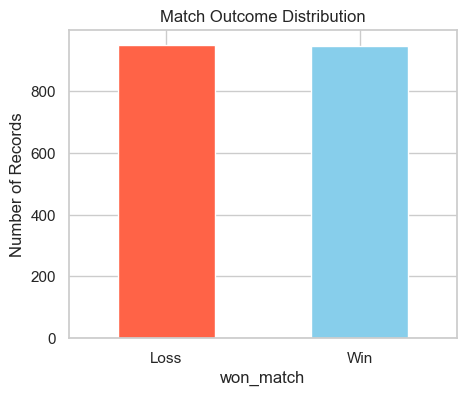

In [63]:
# 1. Class Balance: How many wins vs losses
plt.figure(figsize=(5, 4))
merged_df['won_match'].value_counts().plot(kind='bar', color=['tomato', 'skyblue'])
plt.xticks([0, 1], ['Loss', 'Win'], rotation=0)
plt.title("Match Outcome Distribution")
plt.ylabel("Number of Records")
plt.show()

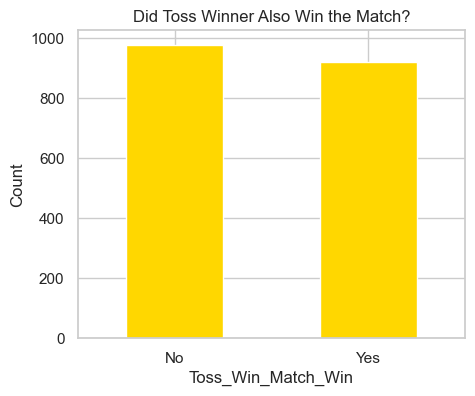

In [64]:
# 2. Toss Winner vs Match Winner
merged_df['Toss_Win_Match_Win'] = (merged_df['TossWinner'] == merged_df['WinningTeam']).astype(int)
plt.figure(figsize=(5, 4))
merged_df['Toss_Win_Match_Win'].value_counts().plot(kind='bar', color='gold')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.title("Did Toss Winner Also Win the Match?")
plt.ylabel("Count")
plt.show()

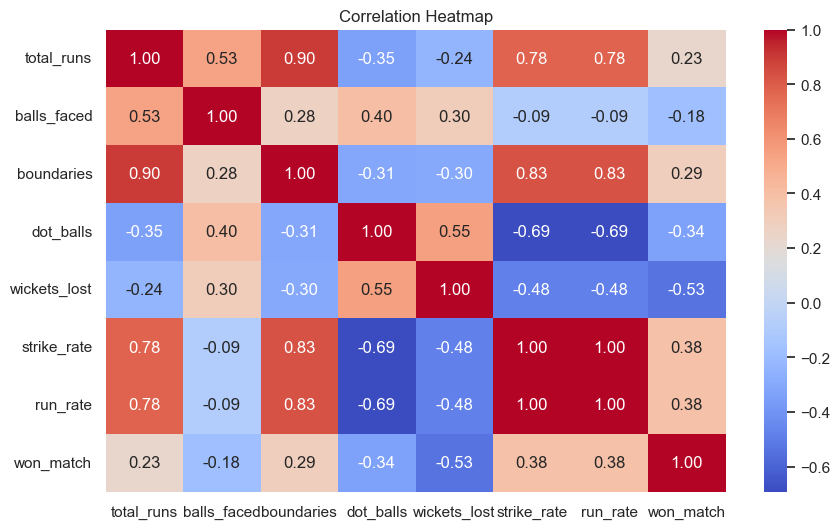

In [66]:
numeric_cols = ['total_runs', 'balls_faced', 'boundaries', 'dot_balls', 'wickets_lost', 'strike_rate', 'run_rate', 'won_match']
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [68]:
# 4. Summary stats for win vs loss
# Summary table grouped by match outcome
summary_table = merged_df.groupby('won_match')[['total_runs', 'boundaries', 'dot_balls',
                                                 'wickets_lost', 'strike_rate', 'run_rate']].mean()

# Rename index for clarity
summary_table.index = summary_table.index.map({0: 'Loss', 1: 'Win'})

# Display styled table with borders
summary_table.style.set_table_attributes("style='border:1px solid black;'").set_caption("Mean Values for Teams that Won vs Lost")

,total_runs,boundaries,dot_balls,wickets_lost,strike_rate,run_rate
won_match,,,,,,
Loss,148.762605,17.380252,44.815126,7.191176,122.375996,7.342560
Win,163.292812,20.739958,38.677590,4.550740,140.221327,8.413280


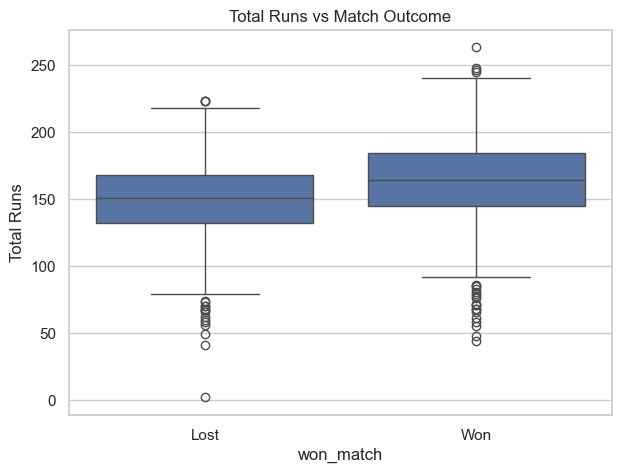

In [70]:
# 5. Boxplot of total_runs by match result
plt.figure(figsize=(7, 5))
sns.boxplot(x='won_match', y='total_runs', data=merged_df)
plt.xticks([0, 1], ['Lost', 'Won'])
plt.title("Total Runs vs Match Outcome")
plt.ylabel("Total Runs")
plt.show()

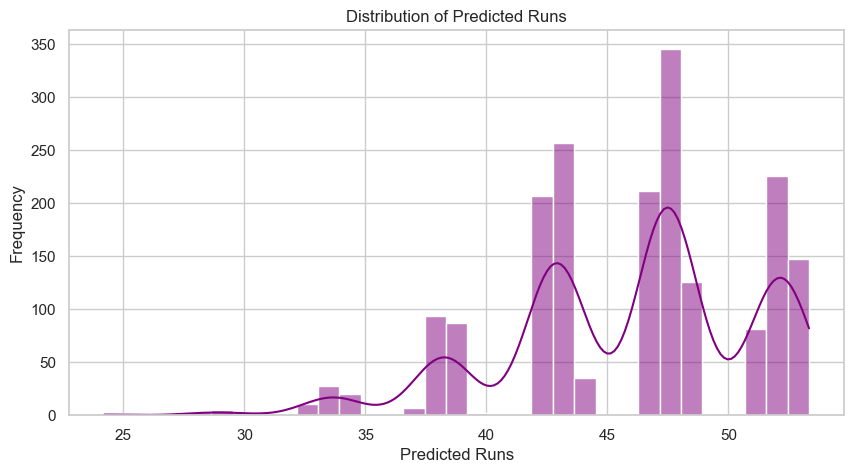

In [72]:
plt.figure(figsize=(10, 5))
sns.histplot(extra_data['predicted_runs'], kde=True, color='purple', alpha=0.5)
plt.title('Distribution of Predicted Runs')
plt.xlabel('Predicted Runs')
plt.ylabel('Frequency')
plt.show()

,Venue,Total Matches,Wins,Win Percentage
0,Arun Jaitley Stadium,28,14,50.000000
25,"Maharashtra Cricket Association Stadium, Pune",26,13,50.000000
27,Nehru Stadium,10,5,50.000000
28,New Wanderers Stadium,16,8,50.000000
29,Newlands,14,7,50.000000
30,OUTsurance Oval,4,2,50.000000
31,Punjab Cricket Association IS Bindra Stadium,20,10,50.000000
32,"Punjab Cricket Association IS Bindra Stadium, ...",22,11,50.000000
33,"Punjab Cricket Association Stadium, Mohali",70,35,50.000000
34,Rajiv Gandhi International Stadium,30,15,50.000000


C:\Users\PC\AppData\Local\Temp\ipykernel_15700\1129198624.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_win_stats.head(15), x='Win Percentage', y='Venue', palette='viridis')


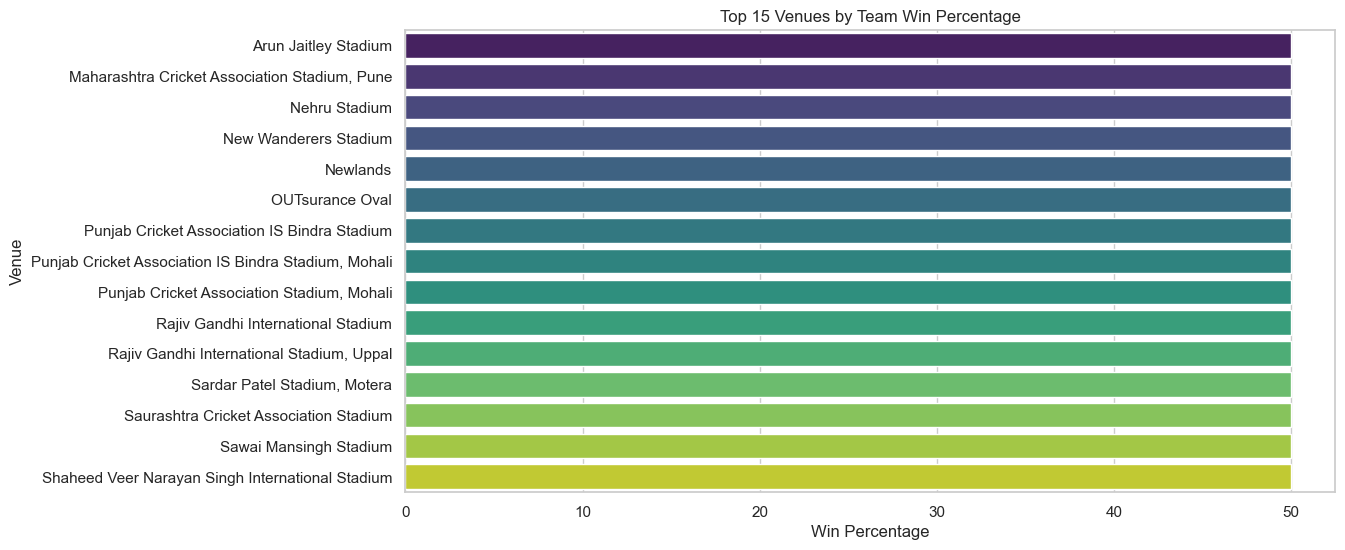

In [73]:
venue_win_stats = merged_df.groupby('Venue')['won_match'].agg(['count', 'sum']).reset_index()
venue_win_stats.columns = ['Venue', 'Total Matches', 'Wins']
venue_win_stats['Win Percentage'] = (venue_win_stats['Wins'] / venue_win_stats['Total Matches']) * 100
venue_win_stats.sort_values(by='Win Percentage', ascending=False, inplace=True)
display(venue_win_stats)
plt.figure(figsize=(12, 6))
sns.barplot(data=venue_win_stats.head(15), x='Win Percentage', y='Venue', palette='viridis')
plt.title("Top 15 Venues by Team Win Percentage")
plt.xlabel("Win Percentage")
plt.ylabel("Venue")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_15700\3378857450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TossDecision', data=match_results, palette='muted')


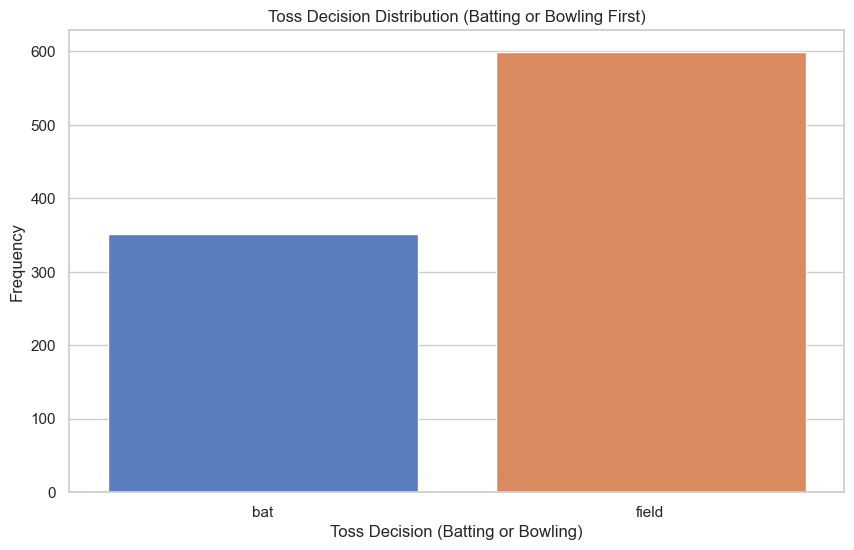

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TossDecision', data=match_results, palette='muted')
plt.title('Toss Decision Distribution (Batting or Bowling First)')
plt.xlabel('Toss Decision (Batting or Bowling)')
plt.ylabel('Frequency')
plt.show()

#### Key Questions ####

##### Q1. Can we predict the number of runs a team will score based on historical match data and team composition? ##### 

In [208]:
runs_df = merged_df[['BattingTeam', 'total_runs', 'boundaries', 'dot_balls', 'wickets_lost', 'strike_rate', 'run_rate', 'Venue', 'TossWinner', 'TossDecision']].copy()
runs_df['BatFirst'] = (runs_df['TossDecision'] == 'field').astype(int)
runs_df['TossWon'] = (runs_df['BattingTeam'] == runs_df['TossWinner']).astype(int)
runs_df.rename(columns={'BattingTeam': 'Team', 'total_runs': 'Runs'}, inplace=True)

In [210]:
X = pd.get_dummies(runs_df[['Team', 'Venue', 'BatFirst', 'TossWon', 'boundaries', 'dot_balls', 'wickets_lost', 'strike_rate', 'run_rate']], 
                   columns=['Team', 'Venue'], drop_first=True)
y = runs_df['Runs']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [220]:
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regressor: RMSE ≈ {rmse:.2f} runs; R² ≈ {r2:.2f}")

Random Forest Regressor: RMSE ≈ 8.77 runs; R² ≈ 0.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Q2. What factors influence the success of a team in the IPL? #####

In [146]:
X_cls = merged_df[['total_runs', 'boundaries', 'dot_balls', 'wickets_lost', 'strike_rate', 'run_rate']]
y_cls = merged_df['won_match']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [158]:
y_pred_log = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
report = classification_report(y_test, y_pred_log)

print(f"Logistic Regression: Accuracy ≈ {accuracy:.2f}")
print("Classification Report:\n", report)

Logistic Regression: Accuracy ≈ 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       199
           1       0.72      0.78      0.75       181

    accuracy                           0.75       380
   macro avg       0.75      0.75      0.75       380
weighted avg       0.75      0.75      0.75       380



##### Q3. Can player statistics (e.g., batting average, strike rate) be used to predict team performance? #####

In [172]:
X = merged_df[['strike_rate', 'run_rate']]
y = merged_df['won_match']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:24:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [188]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"XGBoost Classifier (Player Stats Only): Accuracy ≈ {accuracy:.2f}")
print("Classification Report:\n", report)

XGBoost Classifier (Player Stats Only): Accuracy ≈ 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.56      0.62       199
           1       0.60      0.73      0.66       181

    accuracy                           0.64       380
   macro avg       0.65      0.64      0.64       380
weighted avg       0.65      0.64      0.64       380



##### Q4. Does the venue (stadium) have an impact on the match outcome? #####

In [194]:
venue_encoded = pd.get_dummies(merged_df['Venue'], prefix='Venue', drop_first=True)


In [196]:
X_venue = venue_encoded
y_venue = merged_df['won_match']

In [198]:
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_venue, y_venue, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_v, y_train_v)

LogisticRegression(max_iter=1000)

In [224]:
y_pred_v = logreg.predict(X_test_v)
accuracy = accuracy_score(y_test_v, y_pred_v)
report = classification_report(y_test_v, y_pred_v)
print(f"Logistic Regression (Venue Only): Accuracy ≈ {accuracy:.2f}")
print("Classification Report:\n", report)

Logistic Regression (Venue Only): Accuracy ≈ 0.38
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.37      0.38       199
           1       0.37      0.40      0.38       181

    accuracy                           0.38       380
   macro avg       0.39      0.39      0.38       380
weighted avg       0.39      0.38      0.38       380

